# Welcome to Week 10!
This week, you will explore concepts related to k-means, specifically elbow method, Silhouette score, feature scaling, and distance metrics. 

## Learning Objectives
At the end of this week, you should be able to: 
- Explain the k-means clustering algorithm 
- Apply the elbow method to determine the optimal number of clusters 
- Describe the calculations for the elbow method and the Silhouette score for cluster evaluation 
- Explain the importance of distance metrics and feature scaling in k-means

## 10.1 Lesson: Clustering - Part 1

### K-Means - Elbow Method
Suppose we have a set of fruits whose taste can be rated on a scale of 1 to 5 for the following features: sweetness, sourness, bitterness, and juiciness. We want to know which fruits “go together.”

In [15]:
import pandas as pd

ratings = {
    'Fruit': [
        'Apple',
        'Lemon',
        'Banana',
        'Grapefruit',
        'Mango',
        'Blueberry'
    ],
    'Sweetness (1-5)': [4, 1, 5, 3, 5, 3],
    'Sourness (1-5)' : [2, 5, 1, 4, 2, 3],
    'Bitterness (1-5)': [1, 2, 1, 3, 1, 2],
    'Juiciness (1-5)': [4, 5, 3, 5, 5, 3],
}

df = pd.DataFrame(ratings)
df

,Fruit,Sweetness (1-5),Sourness (1-5),Bitterness (1-5),Juiciness (1-5)
0,Apple,4,2,1,4
1,Lemon,1,5,2,5
2,Banana,5,1,1,3
3,Grapefruit,3,4,3,5
4,Mango,5,2,1,5
5,Blueberry,3,3,2,3


Say we want to group these fruits into three clusters, with similar fruits in each cluster. What should the clusters look like?

With **k-means**, we pick the cluster centroids arbitrarily. (Note: the **centroid** is the geometrical center of the cluster - the average of the points in the cluster. The **cluster** is the set of points.)

Suppose we pick the apple values as the centroid:

In [16]:
centroid = df.iloc[0, 1:].values
centroid

array([4, 2, 1, 4], dtype=object)

Then we can measure the distance of each fruit from the apple. 

For instance, the distance of the lemon from the apple is:

$$\sqrt{(4 - 2)^2 + (2 - 5)^2 + (1 - 2)^2 + (4-5)^2} \; = \; \sqrt{9 + 9 + 1 + 1} \; = \; \sqrt{20}$$

In [17]:
# calculate the distance of the lemon from the apple
lemon = df.iloc[1, 1:].values
distance = ((lemon - centroid) ** 2).sum() ** 0.5
distance

4.47213595499958

It appears that the sweetness of the apple and the sourness of the lemon are really what differentiate the two fruites. 

If we pick three centroids - say, the apple, grapefruit, and lemon, then we can measure which fruits are closest to the apple, which are closest ot the grapefruit, and which are closest to the lemon. As it turns out, everything is closer to the apple. So apart from the lemon and grapefruit, which are their own clusters, we have a cluster composed of:

`["Apple", "Banana", "Mango" "Blueberry"]`

In [ ]:
import numpy as np
import pandas as pd

# 1) pull out your centroids as vectors
apple      = df.loc[df['Fruit']=='Apple', df.columns[1:]].values[0]
grapefruit = df.loc[df['Fruit']=='Grapefruit', df.columns[1:]].values[0]
lemon      = df.loc[df['Fruit']=='Lemon', df.columns[1:]].values[0]

# 2) build a list of rows
rows = []
for name, vec in zip(df['Fruit'], df.iloc[:, 1:].values):
    # compute distances
    dists = {
        'Apple': np.linalg.norm(vec - apple),
        'Grapefruit': np.linalg.norm(vec - grapefruit),
        'Lemon':np.linalg.norm(vec - lemon),
    }
    # pick the nearest
    nearest = min(dists, key=dists.get)

    rows.append({
        'Fruit': name,
        'Distance from Apple': dists['Apple'],
        'Distance from Grapefruit': dists['Grapefruit'],
        'Distance from Lemon': dists['Lemon'],
        'Nearest Centroid': nearest
    })

# 3) make your DataFrame
results_df = pd.DataFrame(rows)
results_df

,Fruit,Distance from Apple,Distance from Grapefruit,Distance from Lemon,Nearest Centroid
0,Apple,0.000000,3.162278,4.472136,Apple
1,Lemon,4.472136,2.449490,0.000000,Lemon
2,Banana,1.732051,4.582576,6.082763,Apple
3,Grapefruit,3.162278,0.000000,2.449490,Grapefruit
4,Mango,1.414214,3.464102,5.099020,Apple
5,Blueberry,2.000000,2.449490,3.464102,Apple


In [45]:
new_centroid = results_df.loc[results_df['Nearest Centroid'] == 'Apple']['Fruit'].to_list()
centroid_list = new_centroid
centroid_list

['Apple', 'Banana', 'Mango', 'Blueberry']

Now, let’s find a better centroid for that cluster. The apple is at `[4, 2, 1, 4]`, but to find a better centroid, we should average the four fruits in the cluster:
- [4, 2, 1, 4]  
- [5, 1, 1, 3]  
- [5, 2, 1, 5]  
- [3, 3, 2, 3]  

In [48]:
avg_apple = df.loc[df['Fruit'].isin(new_centroid), df.columns[1:]].mean().values
print(avg_apple)

[4.25 2.   1.25 3.75]


The mean is: `[4.25, 2, 1.25, 3.75]`. So, let’s plug this new cluster centroid back into the original analysis. Our three cluster centers are:  
- New centroid `(4.25, 2, 1.25, 3.75)` 
- Lemon `(1, 5, 2, 5)` 
- Grapefruit `(3, 4, 3, 5)`

Maybe at this point, one of the other fruits is now closer to lemon or grapefruit than it is to new centroid? After all, new cluster was based around apple, but apple is no longer its centroid. So, it’s entirely possible that with the new centroid of new cluster, it will turn out that apple, banana, mango, or blueberry no longer quite belongs there. 

But in fact, all four members of new cluster — apple, banana, mango, and blueberry — still belong better with the new centroid than with grapefruit or lemon. So we are done; we have found our three clusters. If we found that we were still updating our centroids, we might want to continue further, until there are no more changes to make.

We can then compute the within-cluster sum of squares (WCSS), which is the sum of the squared difference of each item from its own cluster centroid. For example, the sum of squared differences of apple from the centroid of its cluster (new cluster) is 

$$(4 - 4.25)^2 + (2 - 2)^2 + (1 - 1.25)^2 + (1 - 1.25)^2 + (4 - 3.75)^2 = 0.1875$$
  

In [72]:
# calculate the wcss of apple from new centroid
wcss_apple = np.sum((apple - avg_apple) ** 2)
print(f"WCSS for Apple from new centroid: {wcss_apple}")

WCSS for Apple from new centroid: 0.1875


We can find the total WCSS of all clusters as a measure of how well the clusters fit. As we add clusters, the WCSS should always decrease as the new clusters enable a better and better fit. 

In this situation, if we plot the WCSS (also called inertia) vs. k, the number of clusters, we get a graph that looks like Figure 1. 

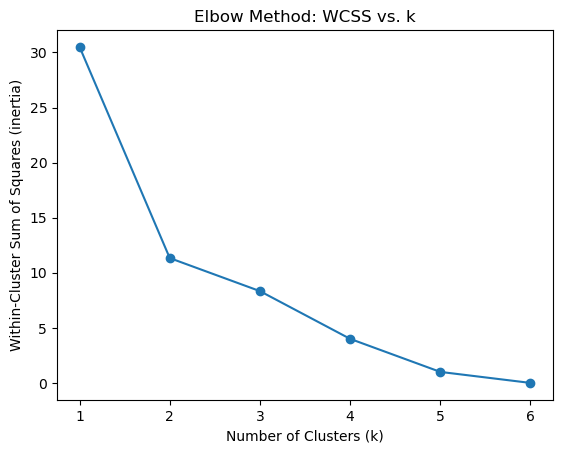

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. extract your feature matrix
X = df.iloc[:, 1:].values

# 2. compute inertia for k = 1…6
ks = range(1, 7)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# 3. plot the elbow curve
plt.plot(ks, inertias, '-o')
plt.xticks(ks)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (inertia)')
plt.title('Elbow Method: WCSS vs. k')
plt.show()

When the number of clusters reaches six, the WCSS is precisely zero because each fruit is the centroid of its own cluster. The “elbow” method is a way of choosing a number of clusters based on this plot. To do it, we look for a place where there is a sharp bend in the curve where the slope abruptly increases (less negative). This appears to happen at $k = 2$, suggesting perhaps we should have two clusters, not three. It says that $k = 3$ clusters is not that much better than $k = 2$, but $k = 2$ is a lot better than $k = 1$. 

## Silhouette Score, Feature Scaling
It is important to use feature scaling for k-means if you want all features to count the same. Recall the real estate example used in last week’s content. Referring to that example of predicting housing prices, if the housing data has two features — price and number of bedrooms — then failing to scale your features will cause problems. If you have two houses: 

- ($300,000, one bedroom) 
- ($300,100, three bedroom) 

Then without scaling, k-means will consider the price difference ($100) to be more important than the bedroom difference (two) since 100 ﻿greater than﻿ 2. This is likely not what you want; a price difference of $100 is not very important, especially by comparison with the overall price of the house, while a bedroom difference of two is huge. 

The **Silhouette score** is a way of deciding how many clusters you want. It involves comparing the inter-cluster distance vs. the intra-cluster distance. For example, you’re using clustering to group neighborhoods based on housing features like median price, square footage, and proximity to amenities. After applying k-means clustering, you calculate the Silhouette score to evaluate how well-defined the clusters are — for instance, whether luxury, mid-range, and budget neighborhoods are clearly separated. A high Silhouette score would suggest that homes in each group are more similar to one another than to homes in other clusters, reinforcing that your clustering captures meaningful market segments. 

The intra-cluster distance of a point is its mean distance to the points in its own cluster (not counting its distance to itself in the mean, which is 0). The inter-cluster distance is its mean distance to the points in another cluster. (We choose the other cluster with the smallest mean distance.) The Silhouette score is the difference between these two, divided by the maximum of the two (which is usually the inter-cluster distance). We then choose the value of ﻿k﻿ for which the mean Silhouette score is as small as possible. 

**Note:** Because a point’s distance of 0 to itself does not count, the intra-cluster distance assumes that there are at least two points in the cluster. If the point is the only point in its cluster, then the Silhouette score is assumed to be 0. 

This is computationally expensive compared with the elbow method. 

### Why the Euclidean is the Best Metric for K-means (see: Week 8 K-Nearest Neighbor)
K-means generally runs with the Euclidean distance metric. That's because the centroid minimizes the sum of squared distances only with this metric. For example, if we have points (1, 1), (1, -1), and (-2, 0), then the centroid is (0, 0) and the sum of squared distances is 8. This is the minimum possible sum of squared distances. The sum of the Manhattan distances, on the other hand, is 6. This can be improved upon by choosing the center point (1, 0), whose summed Manhattan distance is 5. 

### Think About It
- When would we use the k-means algorithm? 
- When would the Silhouette score be used as opposed to the elbow method? 
- Why do we use k-means only with the Euclidean metric?